In [10]:
%%capture
# pip install git+https://github.com/habla-liaa/totalpersistence.git

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[0.   1.   1.   1.41 2.   2.24 0.   1.   2.    inf 0.  ]
 [1.   0.   1.41 1.   2.24 2.   0.   1.   2.    inf 0.  ]
 [1.   1.41 0.   1.   1.   1.41 1.   0.   1.    inf 0.  ]
 [1.41 1.   1.   0.   1.41 1.   1.   0.   1.    inf 0.  ]
 [2.   2.24 1.   1.41 0.   1.   2.   1.   0.    inf 0.  ]
 [2.24 2.   1.41 1.   1.   0.   2.   1.   0.    inf 0.  ]
 [0.   0.   1.   1.   2.   2.   0.   0.33 0.67 1.    inf]
 [1.   1.   0.   0.   1.   1.   0.33 0.   0.33 0.67  inf]
 [2.   2.   1.   1.   0.   0.   0.67 0.33 0.   0.33  inf]
 [ inf  inf  inf  inf  inf  inf 1.   0.67 0.33 0.    inf]
 [0.   0.   0.   0.   0.   0.    inf  inf  inf  inf 0.  ]]
X diagram: [array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0., inf]]), array([[1.        , 1.41421354],
       [1.        , 1.41421354]]), array([], shape=(0, 2), dtype=float64)]
Y diagram: [array([[0.        , 0.33333334],
       [0.        , 0.33333334],
       [0.        , 0.33333334],
       [0.    

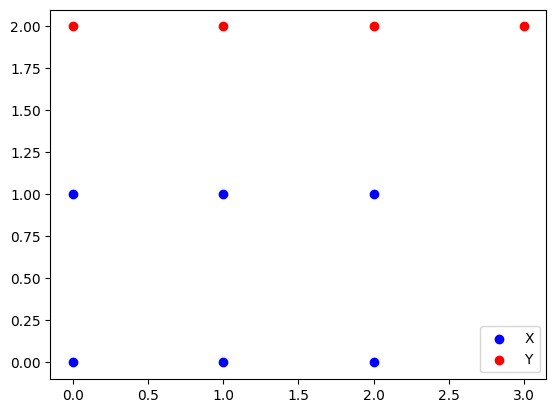

In [12]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]])
Y = np.array([[0, 2], [1, 2], [2, 2], [3, 2]])
f = np.array([0, 0, 1, 1, 2, 2])
f = np.array([0, 0, 1, 1, 2, 2])

plt.scatter(X[:, 0], X[:, 1], color='blue', label='X')
plt.scatter(Y[:, 0], Y[:, 1], color='red', label='Y')
plt.legend()

cone_eps = 1e-10
tol = 1e-10
perturbation = 1e-11

# Compute distance matrices
dX = general_position_distance_matrix(X, perturbation)
dY = general_position_distance_matrix(Y, perturbation)

# Calculate persistence diagrams
coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
    dX, dY, f, maxdim=2, cone_eps=1e-10
)

print("X diagram:", dgmX)
print("Y diagram:", dgmY)

print("Cokernel Diagram:", coker_dgm)
print("Kernel Diagram:", ker_dgm)

# Compute total persistence
results = totalpersistence(coker_dgm, ker_dgm)
coker_distances, ker_distances, coker_matchings, ker_matchings = results

# Print results
print("Cokernel distances:", coker_distances)
print("Kernel distances:", ker_distances)

In [13]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix

# Generate sample point clouds
n_points = 10

np.random.seed(40)  # For reproducibility
X = np.random.rand(n_points, 2)  # Source space points
Y = 2*np.random.rand(n_points, 2)  # Target space points
f = np.arange(n_points)  # Function values

# Compute distance matrices
dX = general_position_distance_matrix(X)
dY = general_position_distance_matrix(Y)

# Calculate persistence diagrams
coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
    dX, dY, f, maxdim=2, cone_eps=0, tol=1e-10
)

print("Cone diagram:", cone_dgm)
print("Kernel Diagram:", ker_dgm)
print("Cokernel Diagram:", coker_dgm)

# Compute total persistence
results = totalpersistence(coker_dgm, ker_dgm)
coker_distances, ker_distances, coker_matchings, ker_matchings = results

# Print results
print("Cokernel distances:", coker_distances)
print("Kernel distances:", ker_distances)

[[0.   0.45 0.25 0.58 0.73 0.79 0.77 0.93 0.08 0.45 0.   1.42 1.32 1.19
  0.83 0.94 0.37 0.67 0.91 0.61 0.  ]
 [0.45 0.   0.34 0.43 0.4  0.37 0.42 0.98 0.38 0.1  1.42 0.   0.96 0.26
  0.59 1.19 1.55 1.77 1.56 1.53 0.  ]
 [0.25 0.34 0.   0.33 0.5  0.61 0.54 0.73 0.18 0.4  1.32 0.96 0.   0.77
  0.92 0.49 1.64 1.26 0.86 1.02 0.  ]
 [0.58 0.43 0.33 0.   0.26 0.46 0.3  0.57 0.51 0.52 1.19 0.26 0.77 0.
  0.39 0.95 1.36 1.51 1.31 1.28 0.  ]
 [0.73 0.4  0.5  0.26 0.   0.22 0.04 0.78 0.65 0.49 0.83 0.59 0.92 0.39
  0.   0.89 0.97 1.26 1.17 1.05 0.  ]
 [0.79 0.37 0.61 0.46 0.22 0.   0.2  1.   0.72 0.42 0.94 1.19 0.49 0.95
  0.89 0.   1.3  0.77 0.39 0.54 0.  ]
 [0.77 0.42 0.54 0.3  0.04 0.2  0.   0.81 0.69 0.51 0.37 1.55 1.64 1.36
  0.97 1.3  0.   1.   1.28 0.98 0.  ]
 [0.93 0.98 0.73 0.57 0.78 1.   0.81 0.   0.89 1.07 0.67 1.77 1.26 1.51
  1.26 0.77 1.   0.   0.47 0.25 0.  ]
 [0.08 0.38 0.18 0.51 0.65 0.72 0.69 0.89 0.   0.39 0.91 1.56 0.86 1.31
  1.17 0.39 1.28 0.47 0.   0.32 0.  ]
 [0.45 0.1  

In [14]:
for i in range(3):
    f = np.random.randint(n_points,size=n_points*2)
    print(f)

    # Calculate persistence diagrams
    coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
        dX, dY, f, maxdim=2
    )

    # Compute total persistence
    results = totalpersistence(coker_dgm, ker_dgm)
    coker_distances, ker_distances, coker_matchings, ker_matchings = results

    # Print results
    print("Cokernel distances:", coker_distances)
    print("Kernel distances:", ker_distances)

[4 4 1 9 6 5 1 8 7 7 6 4 7 1 6 9 4 4 6 1]
[[0.   0.45 0.25 0.58 0.73 0.79 0.77 0.93 0.08 0.45  inf 0.59  inf  inf
  0.   0.89 0.97 1.26 1.17 1.05 0.  ]
 [0.45 0.   0.34 0.43 0.4  0.37 0.42 0.98 0.38 0.1   inf 0.59  inf  inf
  0.   0.89 0.97 1.26 1.17 1.05 0.  ]
 [0.25 0.34 0.   0.33 0.5  0.61 0.54 0.73 0.18 0.4   inf 0.    inf  inf
  0.59 1.19 1.55 1.77 1.56 1.53 0.  ]
 [0.58 0.43 0.33 0.   0.26 0.46 0.3  0.57 0.51 0.52  inf 1.53  inf  inf
  1.05 0.54 0.98 0.25 0.32 0.   0.  ]
 [0.73 0.4  0.5  0.26 0.   0.22 0.04 0.78 0.65 0.49  inf 1.55  inf  inf
  0.97 1.3  0.   1.   1.28 0.98 0.  ]
 [0.79 0.37 0.61 0.46 0.22 0.   0.2  1.   0.72 0.42  inf 1.19  inf  inf
  0.89 0.   1.3  0.77 0.39 0.54 0.  ]
 [0.77 0.42 0.54 0.3  0.04 0.2  0.   0.81 0.69 0.51  inf 0.    inf  inf
  0.59 1.19 1.55 1.77 1.56 1.53 0.  ]
 [0.93 0.98 0.73 0.57 0.78 1.   0.81 0.   0.89 1.07  inf 1.56  inf  inf
  1.17 0.39 1.28 0.47 0.   0.32 0.  ]
 [0.08 0.38 0.18 0.51 0.65 0.72 0.69 0.89 0.   0.39  inf 1.77  inf  inf
  1.26

In [15]:
import numpy as np
from totalpersistence import totalpersistence, kercoker_via_cone
from totalpersistence.utils import general_position_distance_matrix

# Generate sample point clouds
n_points = 10
X = np.random.rand(n_points, 2)  # Source space points
Y = 2 * np.random.rand(n_points, 2)  # Target space points
f = np.arange(n_points)  # Function values

# Compute distance matrices
dX = general_position_distance_matrix(X)
dY = general_position_distance_matrix(Y)

# Calculate persistence diagrams
coker_dgm, ker_dgm, img_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(dX, dY, f, maxdim=2, compute_img=True)

TypeError: kercoker_via_cone() got an unexpected keyword argument 'compute_img'